# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import numpy as np
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

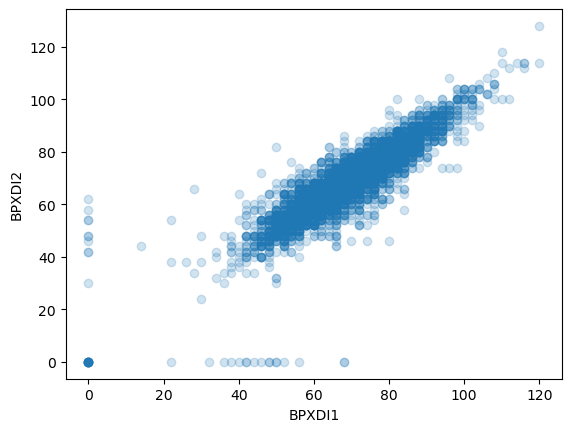

In [2]:
# enter your code here
sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg=False, scatter_kws={"alpha": 0.2})
plt.show()

In [3]:
da.loc[:,["BPXDI1","BPXDI2",'BPXSY1','BPXSY2']].corr()

,BPXDI1,BPXDI2,BPXSY1,BPXSY2
BPXDI1,1.000000,0.884722,0.316531,0.329843
BPXDI2,0.884722,1.000000,0.277681,0.303847
BPXSY1,0.316531,0.277681,1.000000,0.962287
BPXSY2,0.329843,0.303847,0.962287,1.000000


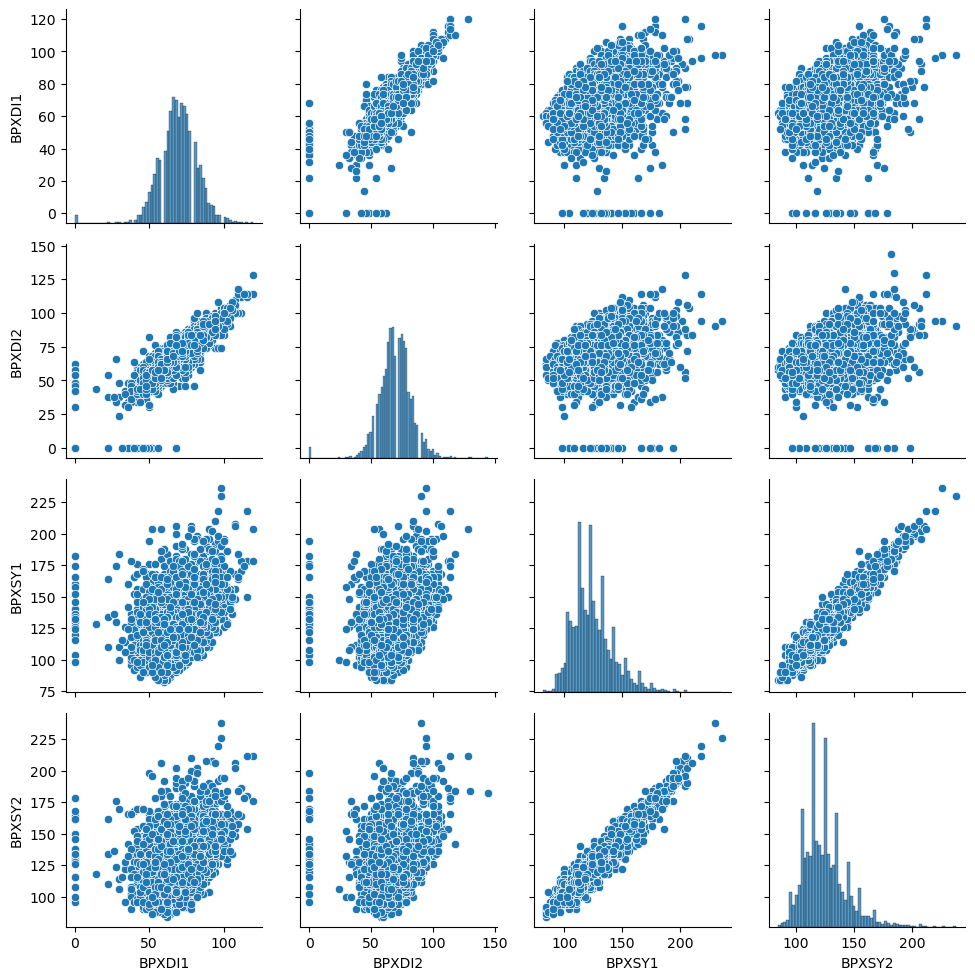

In [4]:
g = sns.PairGrid(da.loc[:,["BPXDI1","BPXDI2",'BPXSY1','BPXSY2']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

The correlations between SY1/DI1 and SY2/DI2 are similar because the correlations between SY1/SY2 and DI1/DI2 are so strong.

SY1 and SY2 have a strong linear relationship.

And although the linear relationship between DI1 and DI2 is not as strong, it is still quite high.

So although SY1/SY2 (and DI1/DI2) are not perfectly interchangeable, they are pretty decent proxies for each other, which leads to similar correlations.

We can visualize this with scatterplots of the variables against each other.

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

the correlation between the sys 1 and sys2 are high, same as the correlation between the BI1 and BI2 
so whatevs the correlation between the sys 1 and BI1 would be roughly the same because how high the correlation between each of the two viables

__Q1b.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

they are less correlated by small margin 
the first Systolic and Diastolic corr = 0.316
the second Systolic and Diastolic corr = 0.303
small differences but tend to be less correlated.

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

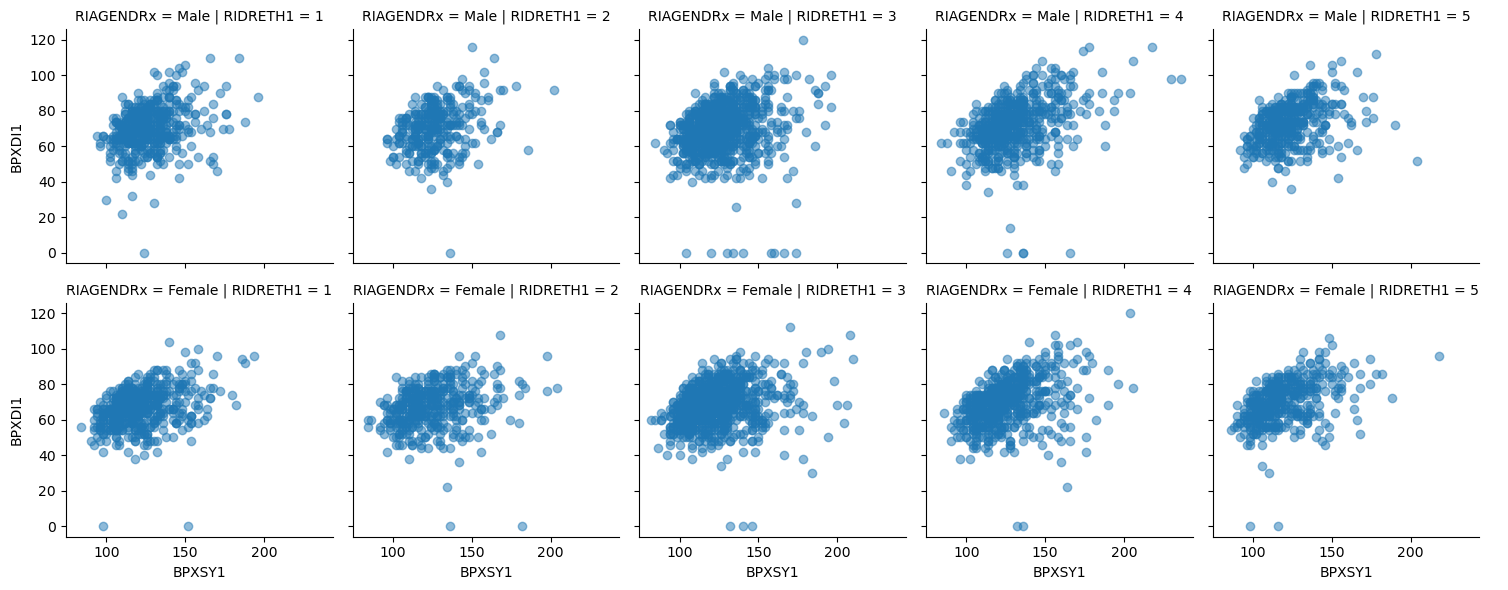

In [5]:
# insert your code here
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

__Q2a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

in general the females tend to have lower blood pressure than males a cross all ethnical groups
the have moderate correlations in all ethnicities but number 3 and 4 has the highest correlation in males specifically more than females we could say that these two groups has high systolic blood pressure compared to other groups



## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

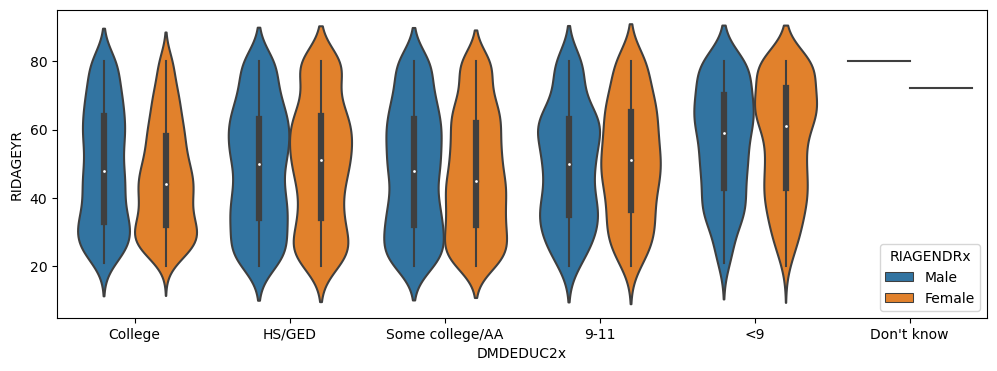

In [6]:
# insert your code here
plt.figure(figsize=(12, 4))
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})

a = sns.violinplot(x = da.DMDEDUC2x , y = da.RIDAGEYR,hue=da.RIAGENDRx)
plt.show()

__Q3a.__ Comment on any evident differences among the age distributions in the different demographic groups.

i cannot see difference between males and females 

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

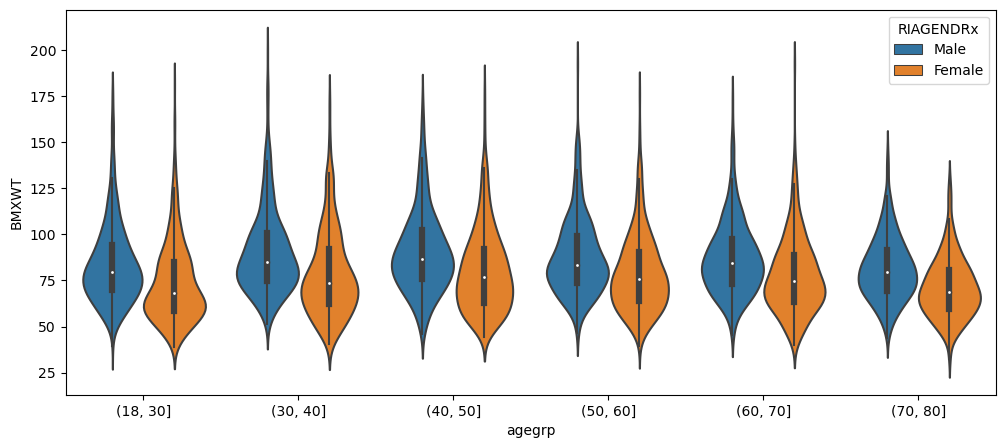

In [10]:
# insert your code here
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.violinplot(x="agegrp", y="BMXWT", hue=da.RIAGENDRx , data=da)  # Make boxplot of BPXSY1 stratified by age group
plt.show()

__Q4a.__ Comment on the trends in BMI across the demographic groups.

it appear that the highest BMI percentile in males in 30-40 years age group 
while in females in 60 -70
but in general the BMI percentile in males is higher than in females across age groups
and the BMI percentile roughly does not changed throughout the age group
we could say there is no correlation between the BMI percentile and Age.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [15]:
# insert your code here
da['RIDRETH1x'] = da['RIDRETH1'].replace({1:"Mexican American",2:"Other Hispanic",3:"Non-Hispanic White",4:"Non-Hispanic Black",5:"Other Race"})
da['HIQ210x'] = da['HIQ210'].replace({1:"Yes",2:"No",9:"Don't know"})


In [40]:
da.dropna()
dx = da.groupby('RIDRETH1x')['HIQ210x'].value_counts()
dx = dx.unstack().fillna(0)
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
# dx.to_string(float_format="%.3f")  # Limit display to 3 decimal places
dx

HIQ210x,Don't know,No,Yes
RIDRETH1x,,,
Mexican American,0.004451,0.857567,0.137982
Non-Hispanic Black,0.000962,0.890385,0.108654
Non-Hispanic White,0.001214,0.931432,0.067354
Other Hispanic,0.000000,0.871304,0.128696
Other Race,0.002516,0.915723,0.081761


__Q5a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Mexican American 